# TP01 Inteligência Artificial: Classificação
## Dataset Titanic - Transformações com Pandas

### 1. Importação de bibliotecas e carregamento do dataset

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df = pd.read_csv('titanic_data.csv')
print(f"Dataset carregado com sucesso!")
print(f"Dimensões originais: {df.shape}")
print(f"\nPrimeiras linhas do dataset:")
df.head()

Dataset carregado com sucesso!
Dimensões originais: (891, 12)

Primeiras linhas do dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1.1 Eliminar as variáveis "PassengerId", "Name", "Ticket" e "Cabin"

In [2]:
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df = df.drop(columns=columns_to_drop)
print(f"Variáveis eliminadas: {columns_to_drop}")
print(f"Novas dimensões: {df.shape}")
print(f"\nColunas restantes: {df.columns.tolist()}")

Variáveis eliminadas: ['PassengerId', 'Name', 'Ticket', 'Cabin']
Novas dimensões: (891, 8)

Colunas restantes: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


### 1.2 Eliminar observações que contenham dados ausentes (NA)

In [3]:
print(f"Dados ausentes por coluna antes da limpeza:")
print(df.isnull().sum())
print(f"\nTotal de linhas antes: {len(df)}")

df = df.dropna()

print(f"Total de linhas após eliminar NAs: {len(df)}")
print(f"Linhas removidas: {891 - len(df)}")
print(f"\nVerificação - dados ausentes após limpeza:")
print(df.isnull().sum())

Dados ausentes por coluna antes da limpeza:
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Total de linhas antes: 891
Total de linhas após eliminar NAs: 712
Linhas removidas: 179

Verificação - dados ausentes após limpeza:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


### 1.3 Aplicar o LabelEncoder nas variáveis "Embarked" e "Sex"

In [4]:
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

print("Valores únicos antes do LabelEncoder:")
print(f"Sex: {df['Sex'].unique()}")
print(f"Embarked: {df['Embarked'].unique()}")

df['Sex'] = le_sex.fit_transform(df['Sex'])
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])

print("\nValores após LabelEncoder:")
print(f"Sex: {df['Sex'].unique()} (0=female, 1=male)")
print(f"Embarked: {df['Embarked'].unique()} (0=C, 1=Q, 2=S)")
print("\nPrimeiras linhas após transformação:")
df.head()

Valores únicos antes do LabelEncoder:
Sex: ['male' 'female']
Embarked: ['S' 'C' 'Q']

Valores após LabelEncoder:
Sex: [1 0] (0=female, 1=male)
Embarked: [2 0 1] (0=C, 1=Q, 2=S)

Primeiras linhas após transformação:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


### 1.4 Separar o dataframe resultante em Treino-Teste (80-20%)

In [5]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dimensões do conjunto de dados completo: {df.shape}")
print(f"\nDimensões após separação:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")
print(f"\nProporção de treino: {len(X_train)/len(X)*100:.1f}%")
print(f"Proporção de teste: {len(X_test)/len(X)*100:.1f}%")

Dimensões do conjunto de dados completo: (712, 8)

Dimensões após separação:
X_train: (569, 7)
X_test: (143, 7)
y_train: (569,)
y_test: (143,)

Proporção de treino: 79.9%
Proporção de teste: 20.1%


## 2. Aplicação do Modelo de Árvore de Decisão

### 2.1 Treinamento do modelo com parâmetros default

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

print("Modelo de Árvore de Decisão treinado com parâmetros default")
print(f"Profundidade máxima da árvore: {tree_model.get_depth()}")

Modelo de Árvore de Decisão treinado com parâmetros default
Profundidade máxima da árvore: 18


### 2.2 Matriz de Confusão

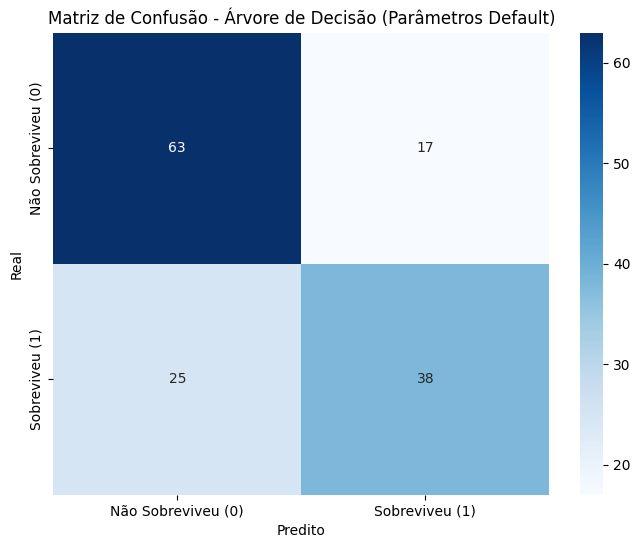

Matriz de Confusão:
[[63 17]
 [25 38]]


In [7]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusão - Árvore de Decisão (Parâmetros Default)')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.xticks([0.5, 1.5], ['Não Sobreviveu (0)', 'Sobreviveu (1)'])
plt.yticks([0.5, 1.5], ['Não Sobreviveu (0)', 'Sobreviveu (1)'])
plt.show()

print(f"Matriz de Confusão:")
print(cm)

### 2.3 Valores TN, TP, FN e FP

In [8]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

print("Valores extraídos da matriz de confusão:")
print(f"TN (True Negative) - Corretamente classificado como Não Sobreviveu: {TN}")
print(f"TP (True Positive) - Corretamente classificado como Sobreviveu: {TP}")
print(f"FN (False Negative) - Incorretamente classificado como Não Sobreviveu: {FN}")
print(f"FP (False Positive) - Incorretamente classificado como Sobreviveu: {FP}")
print(f"\nTotal de predições: {TN + TP + FN + FP}")
print(f"Total de predições corretas: {TN + TP}")
print(f"Total de predições incorretas: {FN + FP}")

Valores extraídos da matriz de confusão:
TN (True Negative) - Corretamente classificado como Não Sobreviveu: 63
TP (True Positive) - Corretamente classificado como Sobreviveu: 38
FN (False Negative) - Incorretamente classificado como Não Sobreviveu: 25
FP (False Positive) - Incorretamente classificado como Sobreviveu: 17

Total de predições: 143
Total de predições corretas: 101
Total de predições incorretas: 42


### 2.4 Acurácia do Modelo

In [9]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Acurácia do modelo: {accuracy:.4f}")
print(f"Acurácia em porcentagem: {accuracy * 100:.2f}%")
print(f"\nVerificação manual: (TN + TP) / Total = ({TN} + {TP}) / {len(y_test)} = {(TN + TP) / len(y_test):.4f}")

Acurácia do modelo: 0.7063
Acurácia em porcentagem: 70.63%

Verificação manual: (TN + TP) / Total = (63 + 38) / 143 = 0.7063


### Métricas: Precision, Recall e F1-Score

In [10]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Métricas de Avaliação do Modelo:")
print("-" * 40)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\nInterpretação das métricas:")
print(f"Precision: De todas as previsões de sobrevivência, {precision*100:.2f}% estavam corretas")
print(f"Recall: De todos que realmente sobreviveram, {recall*100:.2f}% foram identificados corretamente")
print(f"F1-Score: Média harmônica entre Precision e Recall = {f1:.4f}")

Métricas de Avaliação do Modelo:
----------------------------------------
Precision: 0.6909
Recall: 0.6032
F1-Score: 0.6441

Interpretação das métricas:
Precision: De todas as previsões de sobrevivência, 69.09% estavam corretas
Recall: De todos que realmente sobreviveram, 60.32% foram identificados corretamente
F1-Score: Média harmônica entre Precision e Recall = 0.6441


## 3. Experimentação com Diferentes Profundidades

### 3.1 Testando duas novas profundidades da árvore

In [11]:
depths = [3, 5]
results = {}

results['default'] = {
    'depth': tree_model.get_depth(),
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1
}

for depth in depths:
    tree_depth = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_depth.fit(X_train, y_train)
    y_pred_depth = tree_depth.predict(X_test)
    
    results[f'depth_{depth}'] = {
        'depth': depth,
        'accuracy': accuracy_score(y_test, y_pred_depth),
        'precision': precision_score(y_test, y_pred_depth),
        'recall': recall_score(y_test, y_pred_depth),
        'f1': f1_score(y_test, y_pred_depth)
    }
    
    print(f"\n=== Árvore com profundidade máxima = {depth} ===")
    cm_depth = confusion_matrix(y_test, y_pred_depth)
    print(f"Matriz de Confusão:")
    print(cm_depth)
    print(f"Acurácia: {results[f'depth_{depth}']['accuracy']:.4f}")
    print(f"Precision: {results[f'depth_{depth}']['precision']:.4f}")
    print(f"Recall: {results[f'depth_{depth}']['recall']:.4f}")
    print(f"F1-Score: {results[f'depth_{depth}']['f1']:.4f}")


=== Árvore com profundidade máxima = 3 ===
Matriz de Confusão:
[[69 11]
 [25 38]]
Acurácia: 0.7483
Precision: 0.7755
Recall: 0.6032
F1-Score: 0.6786

=== Árvore com profundidade máxima = 5 ===
Matriz de Confusão:
[[76  4]
 [33 30]]
Acurácia: 0.7413
Precision: 0.8824
Recall: 0.4762
F1-Score: 0.6186


### Comparação das Métricas

Tabela Comparativa das Métricas:
         depth  accuracy  precision  recall      f1
default     18    0.7063     0.6909  0.6032  0.6441
depth_3      3    0.7483     0.7755  0.6032  0.6786
depth_5      5    0.7413     0.8824  0.4762  0.6186


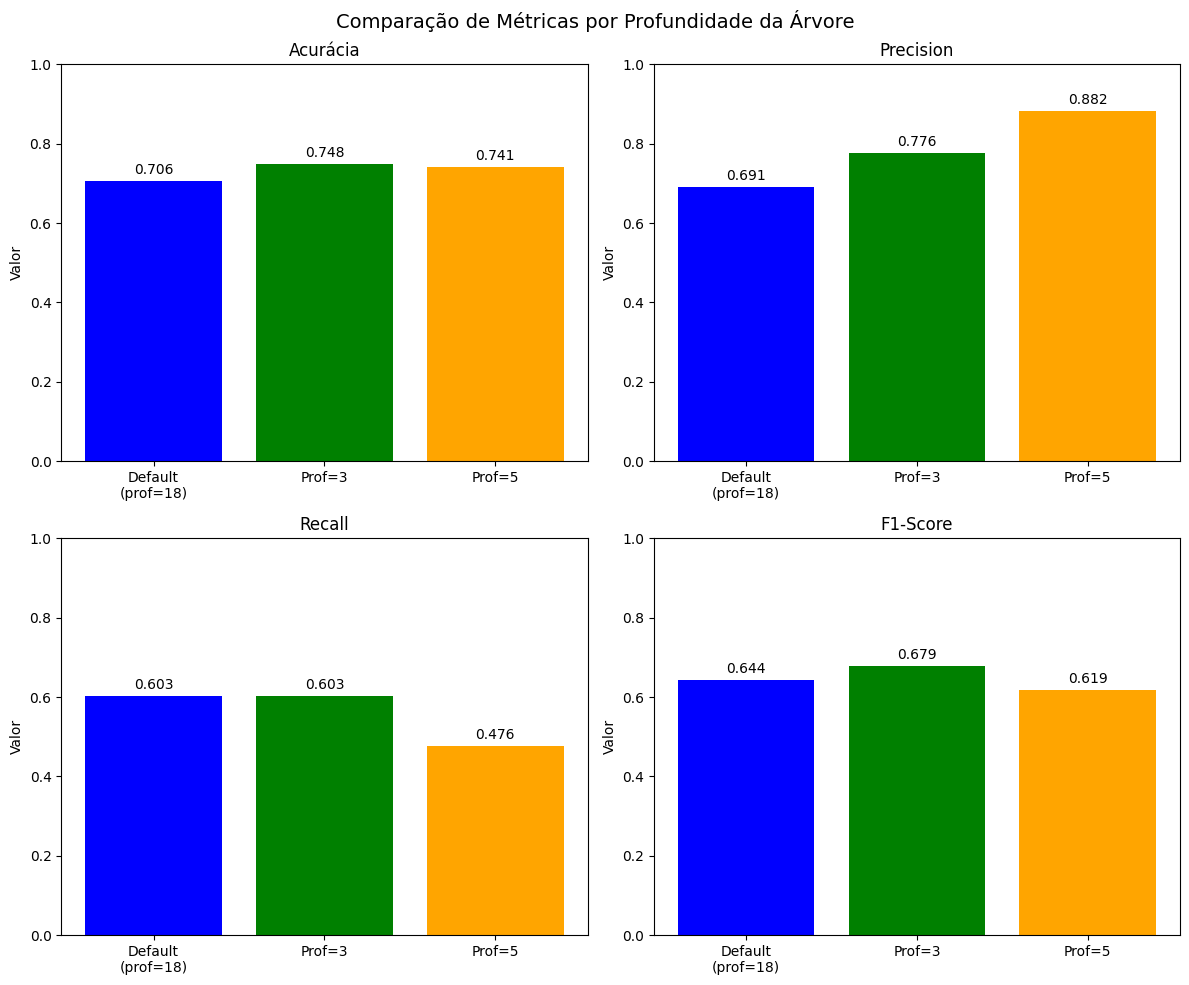

In [12]:
comparison_df = pd.DataFrame(results).T
comparison_df['depth'] = comparison_df['depth'].astype(int)
comparison_df = comparison_df.round(4)

print("Tabela Comparativa das Métricas:")
print("=" * 70)
print(comparison_df)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

metrics = ['accuracy', 'precision', 'recall', 'f1']
titles = ['Acurácia', 'Precision', 'Recall', 'F1-Score']

for i, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes[i // 2, i % 2]
    x = ['Default\n(prof=' + str(results['default']['depth']) + ')', 'Prof=3', 'Prof=5']
    y = [results['default'][metric], results['depth_3'][metric], results['depth_5'][metric]]
    bars = ax.bar(x, y, color=['blue', 'green', 'orange'])
    ax.set_title(title)
    ax.set_ylim([0, 1])
    ax.set_ylabel('Valor')
    
    for bar, val in zip(bars, y):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{val:.3f}', ha='center', va='bottom')

plt.suptitle('Comparação de Métricas por Profundidade da Árvore', fontsize=14)
plt.tight_layout()
plt.show()

### Conclusão sobre o Impacto das Alterações de Profundidade

In [13]:
print("ANÁLISE DO IMPACTO DA PROFUNDIDADE NA ÁRVORE DE DECISÃO")
print("=" * 60)

print(f"\n1. Profundidade Default (sem limitação): {results['default']['depth']}")
print(f"   - Acurácia: {results['default']['accuracy']:.4f}")
print(f"   - Precision: {results['default']['precision']:.4f}")
print(f"   - Recall: {results['default']['recall']:.4f}")
print(f"   - F1-Score: {results['default']['f1']:.4f}")

print(f"\n2. Profundidade = 3 (árvore mais rasa)")
print(f"   - Acurácia: {results['depth_3']['accuracy']:.4f} ", end="")
diff_acc_3 = results['depth_3']['accuracy'] - results['default']['accuracy']
print(f"({diff_acc_3:+.4f} vs default)")
print(f"   - Precision: {results['depth_3']['precision']:.4f} ", end="")
diff_prec_3 = results['depth_3']['precision'] - results['default']['precision']
print(f"({diff_prec_3:+.4f} vs default)")
print(f"   - Recall: {results['depth_3']['recall']:.4f} ", end="")
diff_rec_3 = results['depth_3']['recall'] - results['default']['recall']
print(f"({diff_rec_3:+.4f} vs default)")
print(f"   - F1-Score: {results['depth_3']['f1']:.4f} ", end="")
diff_f1_3 = results['depth_3']['f1'] - results['default']['f1']
print(f"({diff_f1_3:+.4f} vs default)")

print(f"\n3. Profundidade = 5 (árvore intermediária)")
print(f"   - Acurácia: {results['depth_5']['accuracy']:.4f} ", end="")
diff_acc_5 = results['depth_5']['accuracy'] - results['default']['accuracy']
print(f"({diff_acc_5:+.4f} vs default)")
print(f"   - Precision: {results['depth_5']['precision']:.4f} ", end="")
diff_prec_5 = results['depth_5']['precision'] - results['default']['precision']
print(f"({diff_prec_5:+.4f} vs default)")
print(f"   - Recall: {results['depth_5']['recall']:.4f} ", end="")
diff_rec_5 = results['depth_5']['recall'] - results['default']['recall']
print(f"({diff_rec_5:+.4f} vs default)")
print(f"   - F1-Score: {results['depth_5']['f1']:.4f} ", end="")
diff_f1_5 = results['depth_5']['f1'] - results['default']['f1']
print(f"({diff_f1_5:+.4f} vs default)")

print("\n" + "=" * 60)
print("CONCLUSÕES:")
print("-" * 60)

if results['depth_3']['accuracy'] > results['default']['accuracy']:
    print("• A árvore com profundidade 3 apresentou MELHOR acurácia,")
    print("  indicando que a árvore default pode estar com overfitting.")
elif results['depth_3']['accuracy'] < results['default']['accuracy']:
    print("• A árvore com profundidade 3 apresentou PIOR acurácia,")
    print("  indicando que está muito simplificada (underfitting).")
else:
    print("• A árvore com profundidade 3 manteve a mesma acurácia.")

if results['depth_5']['accuracy'] > results['depth_3']['accuracy']:
    print("\n• Profundidade 5 teve desempenho superior à profundidade 3,")
    print("  mostrando que mais complexidade ajudou na classificação.")
elif results['depth_5']['accuracy'] < results['depth_3']['accuracy']:
    print("\n• Profundidade 5 teve desempenho inferior à profundidade 3,")
    print("  sugerindo que mais complexidade não melhorou o modelo.")
else:
    print("\n• Profundidades 3 e 5 tiveram desempenho similar.")

best_model = max(results.items(), key=lambda x: x[1]['accuracy'])
print(f"\n• MELHOR MODELO: {best_model[0]} com acurácia de {best_model[1]['accuracy']:.4f}")

print("\n• A limitação de profundidade pode ajudar a prevenir overfitting,")
print("  mas profundidade muito baixa pode causar underfitting.")
print("• O modelo default sem limitação de profundidade pode capturar")
print("  padrões muito específicos do conjunto de treino.")

ANÁLISE DO IMPACTO DA PROFUNDIDADE NA ÁRVORE DE DECISÃO

1. Profundidade Default (sem limitação): 18
   - Acurácia: 0.7063
   - Precision: 0.6909
   - Recall: 0.6032
   - F1-Score: 0.6441

2. Profundidade = 3 (árvore mais rasa)
   - Acurácia: 0.7483 (+0.0420 vs default)
   - Precision: 0.7755 (+0.0846 vs default)
   - Recall: 0.6032 (+0.0000 vs default)
   - F1-Score: 0.6786 (+0.0345 vs default)

3. Profundidade = 5 (árvore intermediária)
   - Acurácia: 0.7413 (+0.0350 vs default)
   - Precision: 0.8824 (+0.1914 vs default)
   - Recall: 0.4762 (-0.1270 vs default)
   - F1-Score: 0.6186 (-0.0255 vs default)

CONCLUSÕES:
------------------------------------------------------------
• A árvore com profundidade 3 apresentou MELHOR acurácia,
  indicando que a árvore default pode estar com overfitting.

• Profundidade 5 teve desempenho inferior à profundidade 3,
  sugerindo que mais complexidade não melhorou o modelo.

• MELHOR MODELO: depth_3 com acurácia de 0.7483

• A limitação de profundi

## 4. Visualização das Árvores de Decisão

### 4.1 Árvore Original (Profundidade Default = 18)

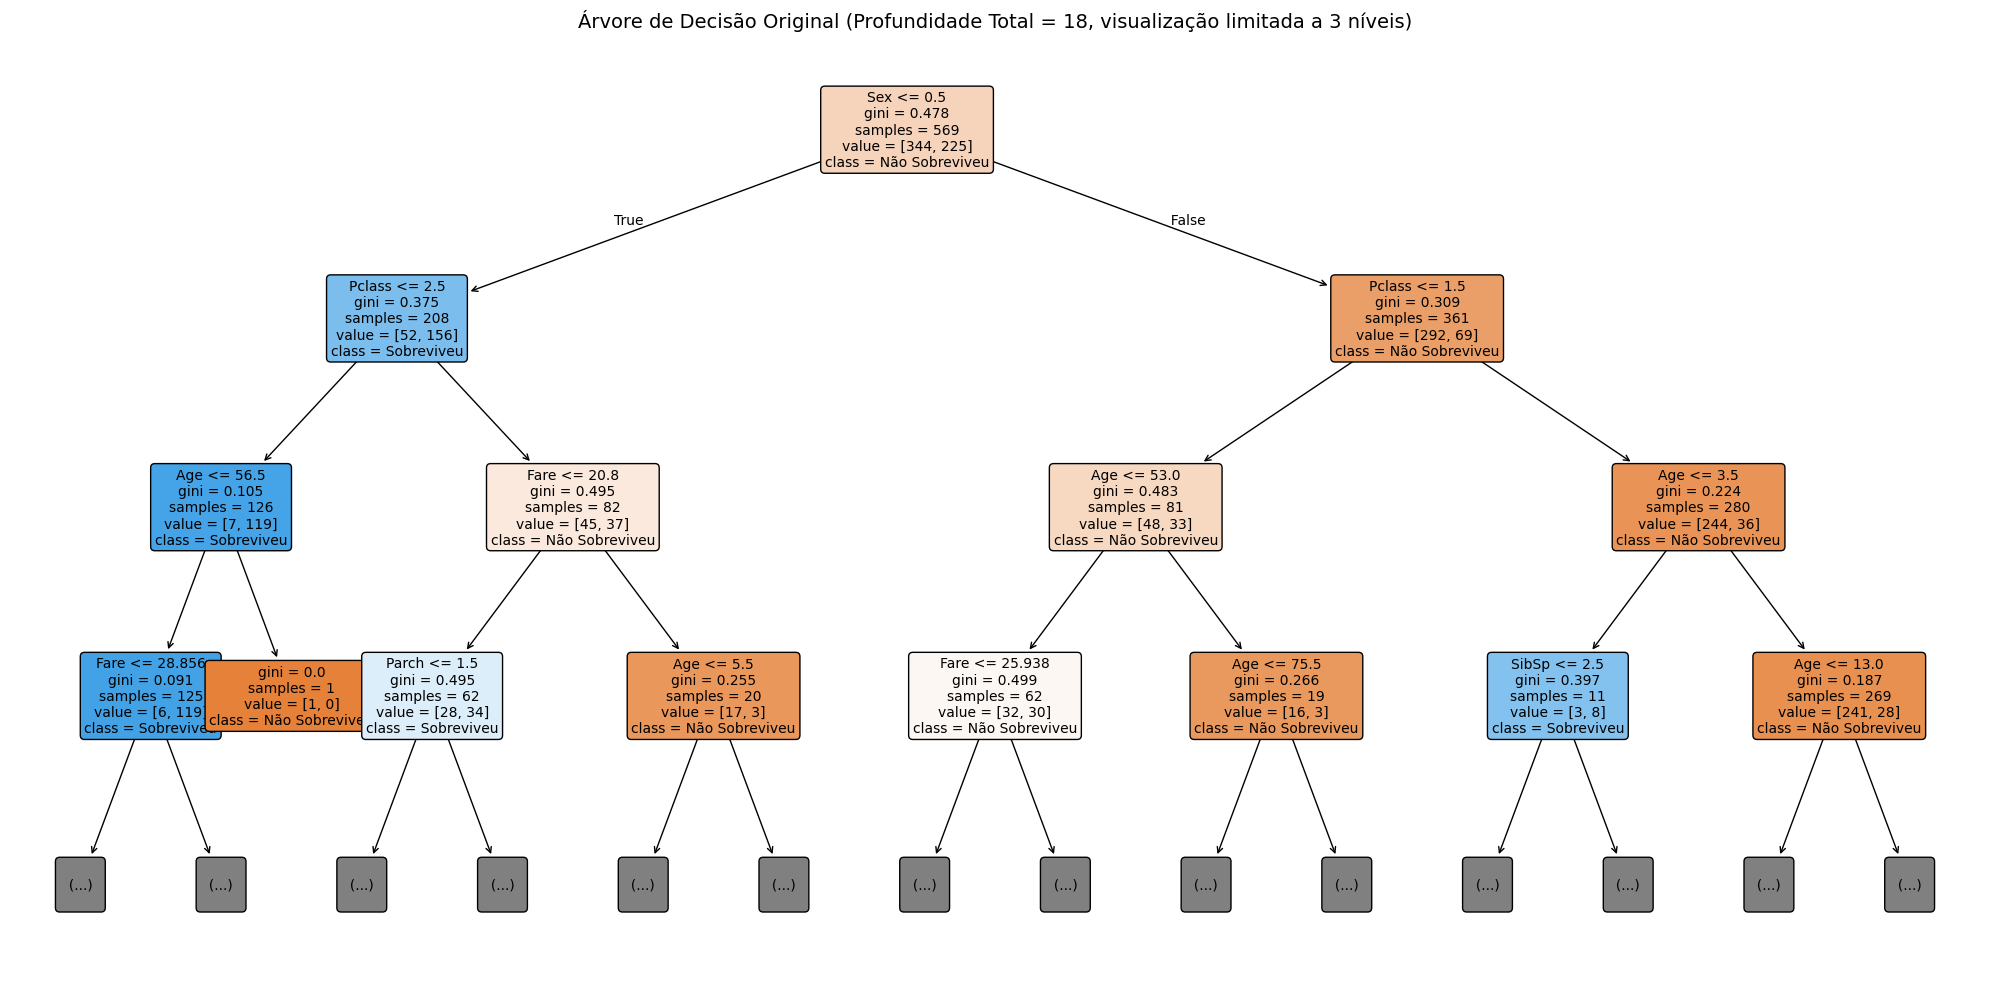

Árvore original com profundidade completa de 18 níveis
Número total de nós: 237
Número de folhas: 119


In [14]:
from sklearn.tree import plot_tree

feature_names = X.columns.tolist()
class_names = ['Não Sobreviveu', 'Sobreviveu']

plt.figure(figsize=(20, 10))
plot_tree(tree_model, 
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=3)
plt.title(f'Árvore de Decisão Original (Profundidade Total = {tree_model.get_depth()}, visualização limitada a 3 níveis)', fontsize=14)
plt.tight_layout()
plt.show()

print(f"Árvore original com profundidade completa de {tree_model.get_depth()} níveis")
print(f"Número total de nós: {tree_model.tree_.node_count}")
print(f"Número de folhas: {tree_model.tree_.n_leaves}")

### 4.2 Árvore com Profundidade Máxima = 3

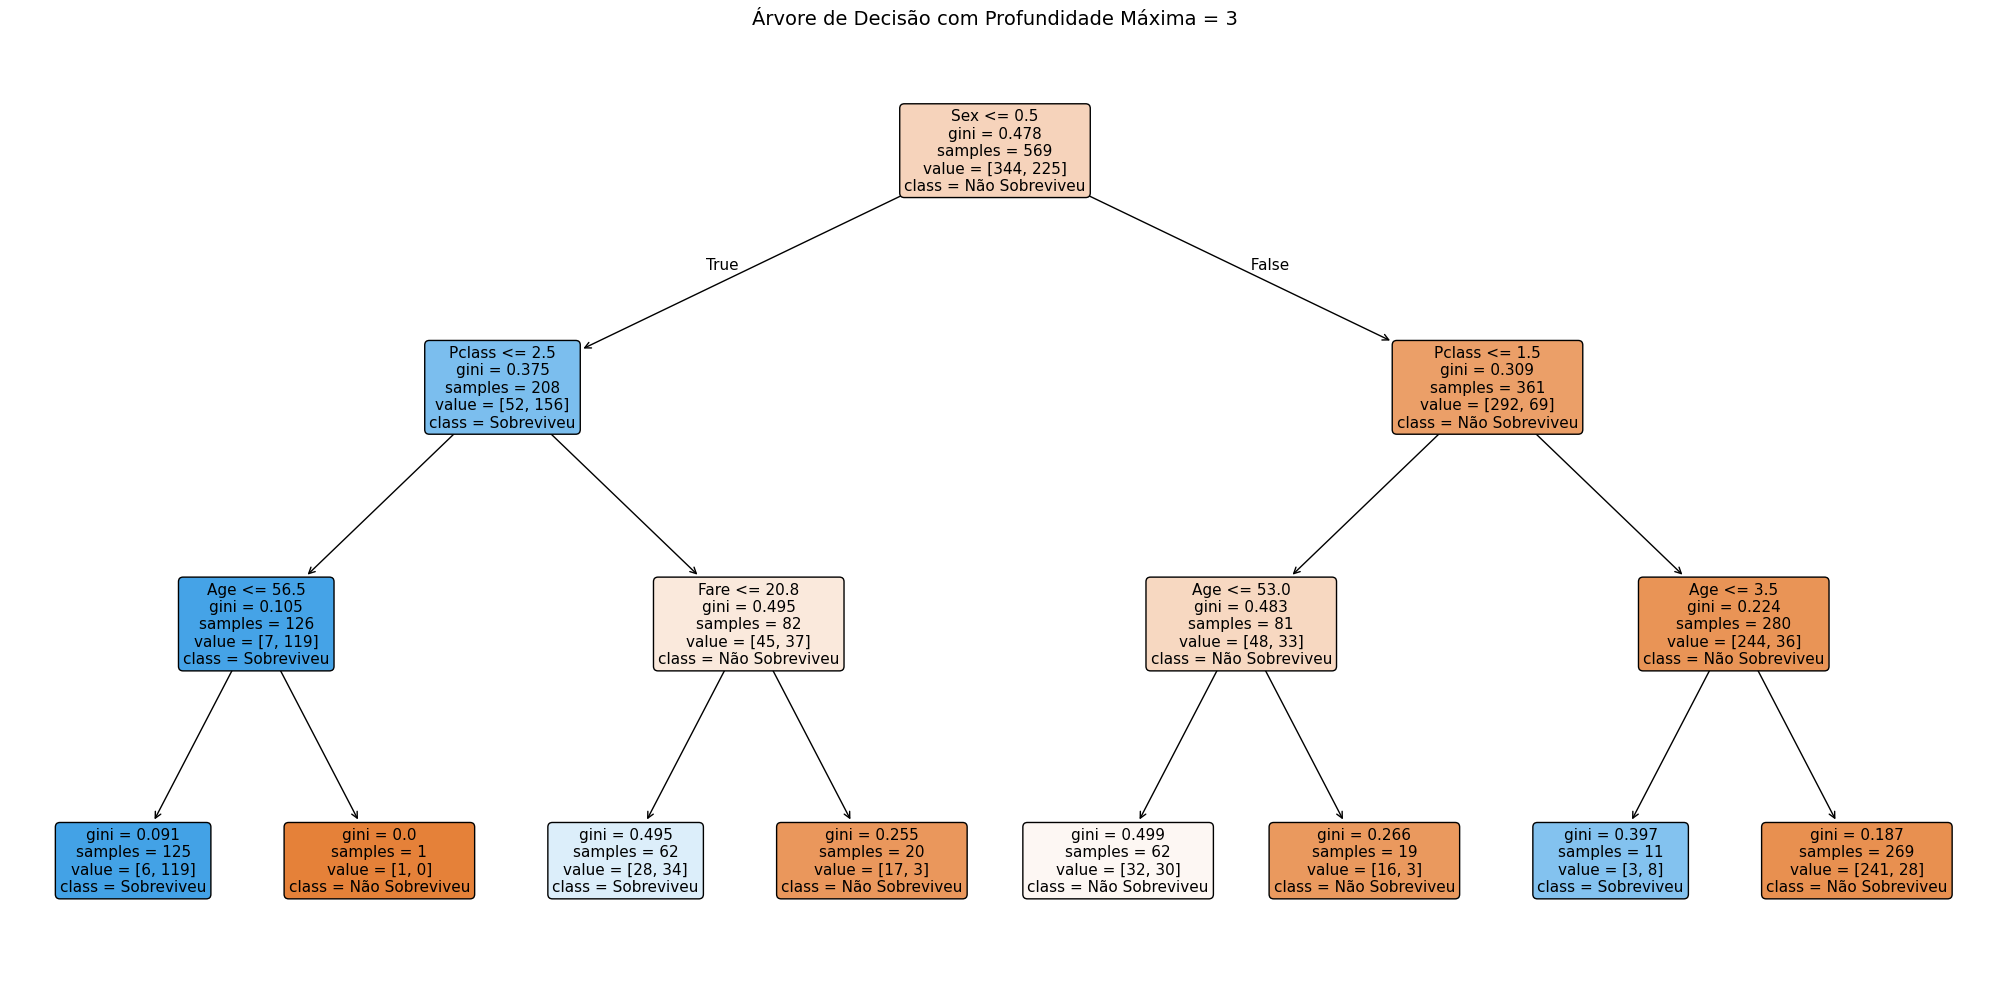

Árvore com profundidade limitada a 3 níveis
Número total de nós: 15
Número de folhas: 8
Acurácia no conjunto de teste: 0.7483


In [15]:
tree_depth3 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_depth3.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(tree_depth3,
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          rounded=True,
          fontsize=11)
plt.title('Árvore de Decisão com Profundidade Máxima = 3', fontsize=14)
plt.tight_layout()
plt.show()

print(f"Árvore com profundidade limitada a 3 níveis")
print(f"Número total de nós: {tree_depth3.tree_.node_count}")
print(f"Número de folhas: {tree_depth3.tree_.n_leaves}")
print(f"Acurácia no conjunto de teste: {results['depth_3']['accuracy']:.4f}")

### 4.3 Árvore com Profundidade Máxima = 5

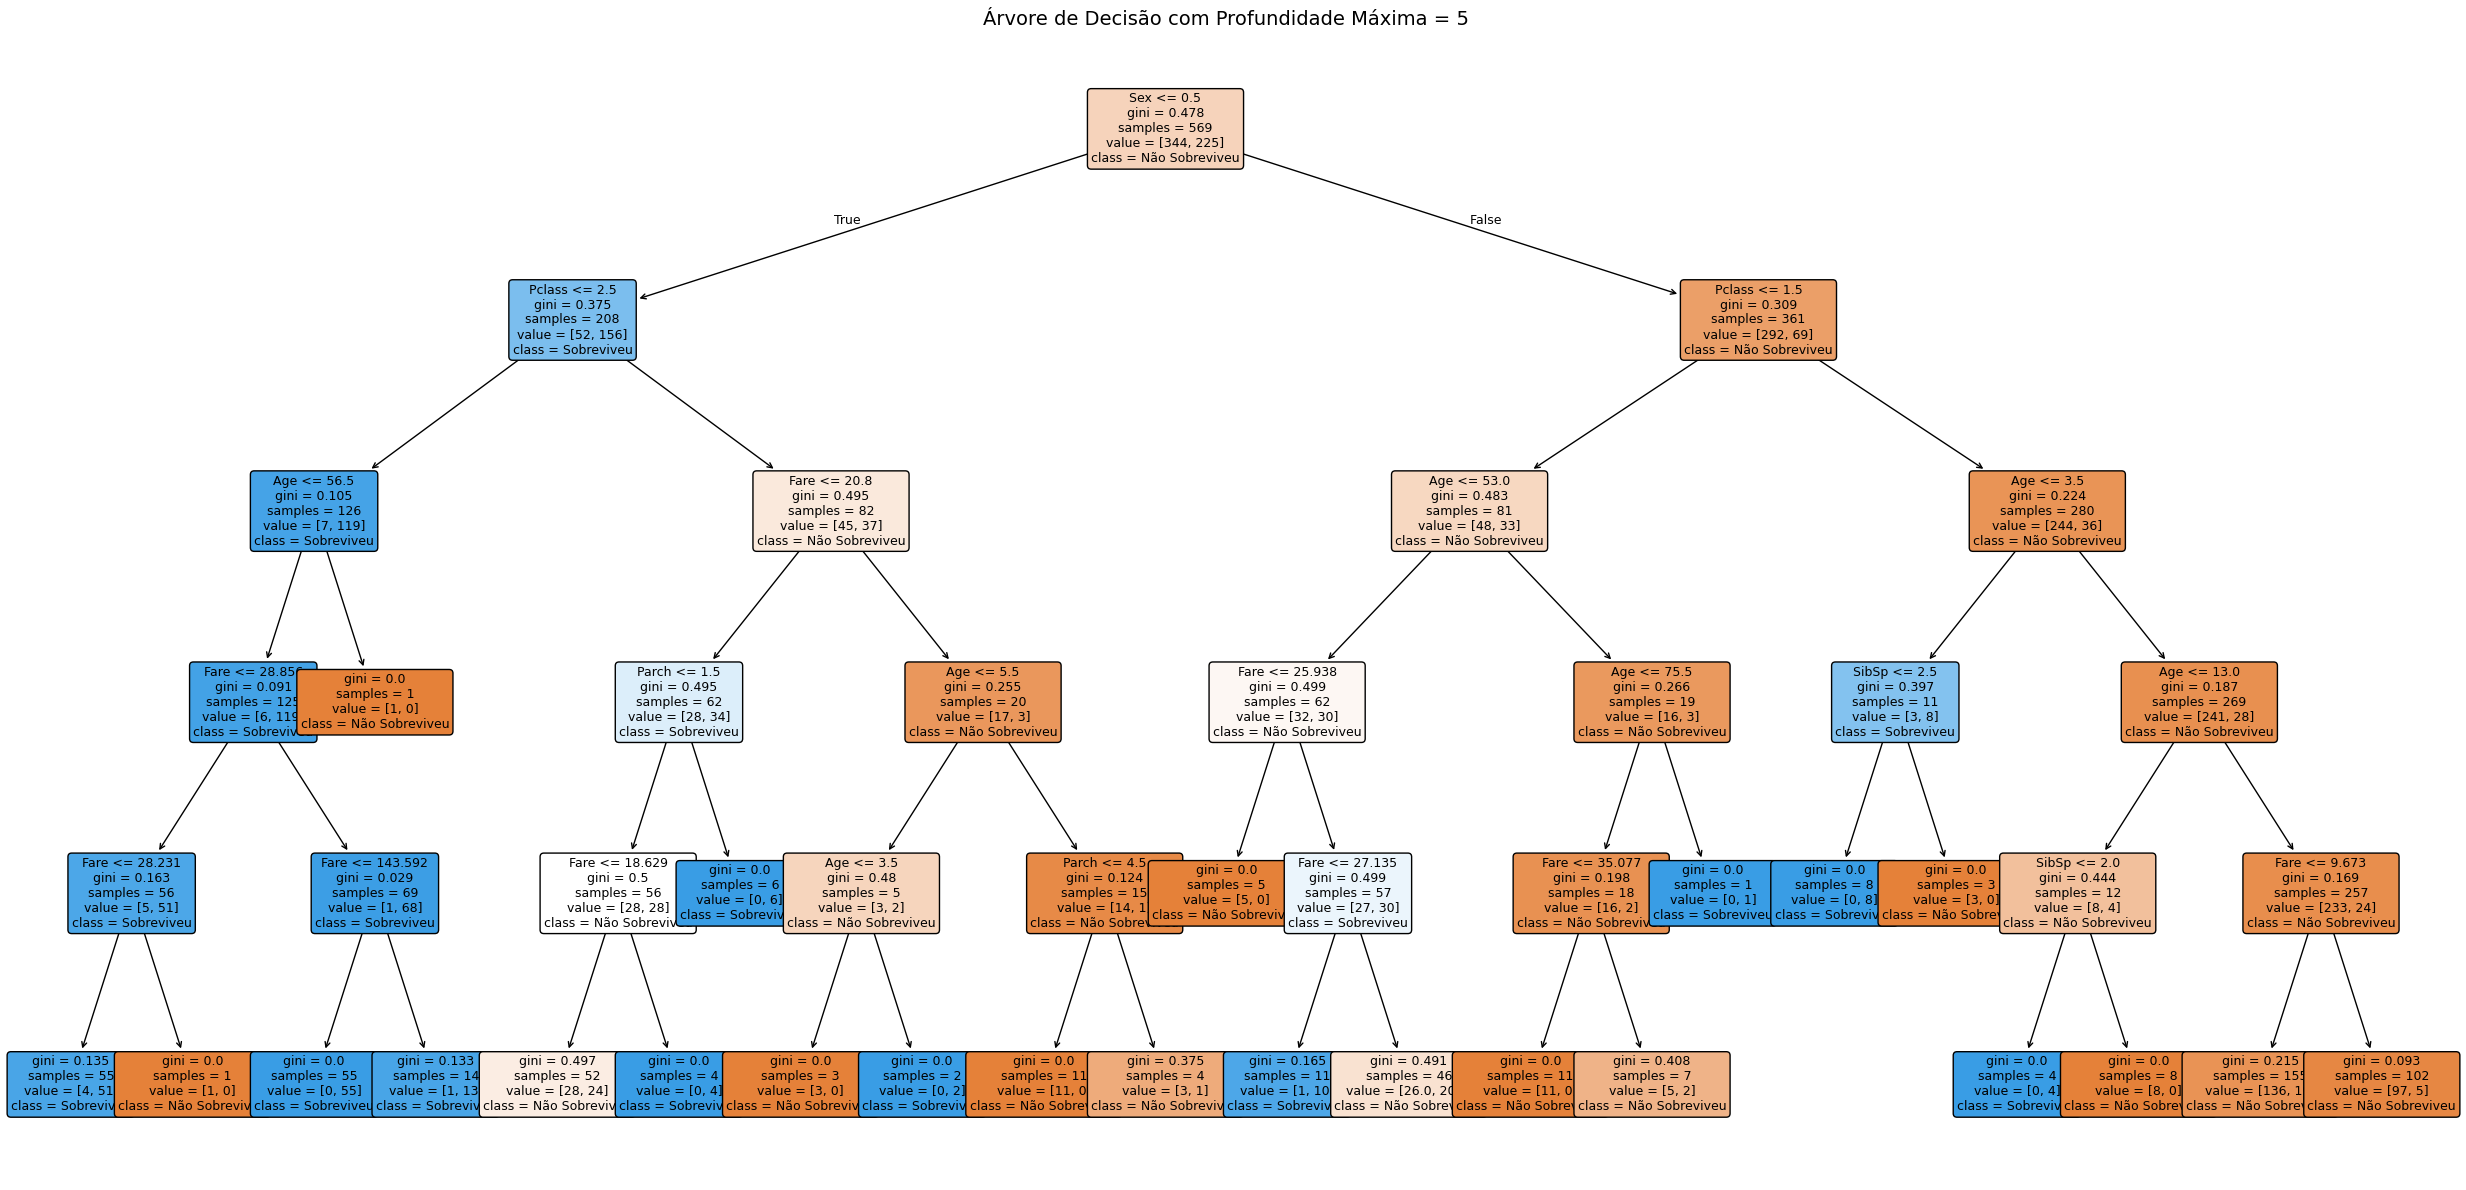

Árvore com profundidade limitada a 5 níveis
Número total de nós: 47
Número de folhas: 24
Acurácia no conjunto de teste: 0.7413


In [16]:
tree_depth5 = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_depth5.fit(X_train, y_train)

plt.figure(figsize=(25, 12))
plot_tree(tree_depth5,
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          rounded=True,
          fontsize=9)
plt.title('Árvore de Decisão com Profundidade Máxima = 5', fontsize=14)
plt.tight_layout()
plt.show()

print(f"Árvore com profundidade limitada a 5 níveis")
print(f"Número total de nós: {tree_depth5.tree_.node_count}")
print(f"Número de folhas: {tree_depth5.tree_.n_leaves}")
print(f"Acurácia no conjunto de teste: {results['depth_5']['accuracy']:.4f}")

### 4.4 Comparação Visual da Complexidade das Árvores

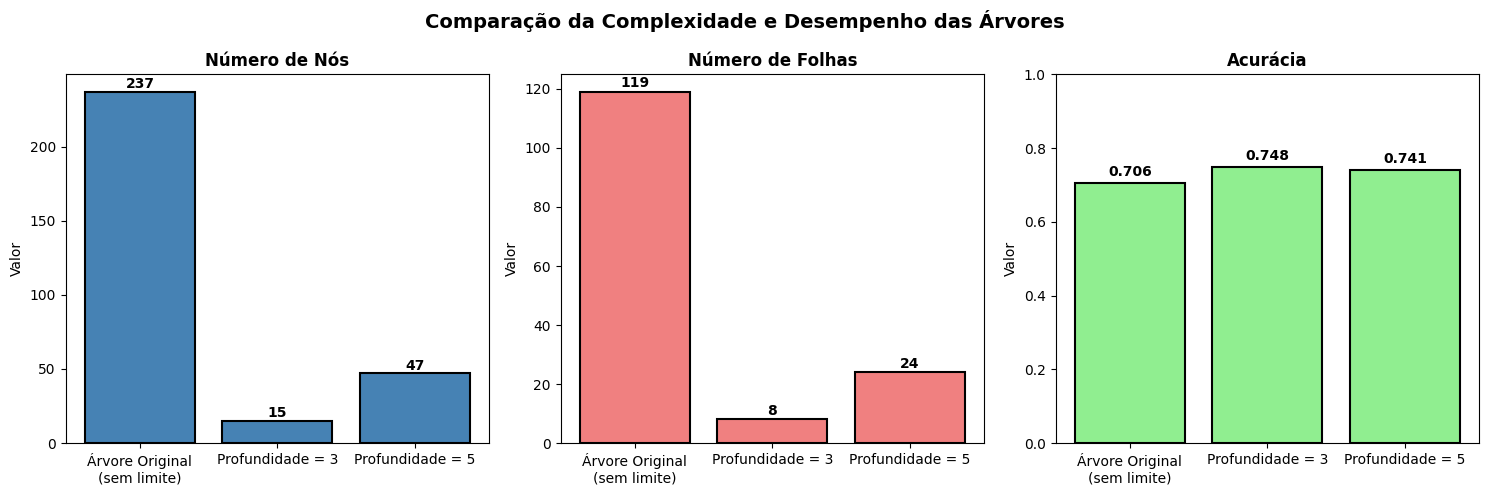

Resumo Comparativo das Três Árvores:
                               profundidade    nós  folhas  acurácia
Árvore Original\n(sem limite)          18.0  237.0   119.0  0.706294
Profundidade = 3                        3.0   15.0     8.0  0.748252
Profundidade = 5                        5.0   47.0    24.0  0.741259


In [17]:
trees_info = {
    'Árvore Original\n(sem limite)': {
        'profundidade': tree_model.get_depth(),
        'nós': tree_model.tree_.node_count,
        'folhas': tree_model.tree_.n_leaves,
        'acurácia': results['default']['accuracy']
    },
    'Profundidade = 3': {
        'profundidade': 3,
        'nós': tree_depth3.tree_.node_count,
        'folhas': tree_depth3.tree_.n_leaves,
        'acurácia': results['depth_3']['accuracy']
    },
    'Profundidade = 5': {
        'profundidade': 5,
        'nós': tree_depth5.tree_.node_count,
        'folhas': tree_depth5.tree_.n_leaves,
        'acurácia': results['depth_5']['accuracy']
    }
}

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

metrics = ['nós', 'folhas', 'acurácia']
titles = ['Número de Nós', 'Número de Folhas', 'Acurácia']
colors = ['steelblue', 'lightcoral', 'lightgreen']

for i, (metric, title, color) in enumerate(zip(metrics, titles, colors)):
    ax = axes[i]
    labels = list(trees_info.keys())
    values = [trees_info[label][metric] for label in labels]
    
    bars = ax.bar(labels, values, color=color, edgecolor='black', linewidth=1.5)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_ylabel('Valor')
    
    for bar, val in zip(bars, values):
        if metric == 'acurácia':
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                   f'{val:.3f}', ha='center', va='bottom', fontweight='bold')
        else:
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                   f'{val}', ha='center', va='bottom', fontweight='bold')
    
    if metric == 'acurácia':
        ax.set_ylim([0, 1])

plt.suptitle('Comparação da Complexidade e Desempenho das Árvores', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Resumo Comparativo das Três Árvores:")
print("=" * 70)
comparison_trees = pd.DataFrame(trees_info).T
print(comparison_trees)